In [3]:
# FEATURES ADDED:
    #1 Renewed text formatting: emojis, color codes in the text, linebreaks for UX purposes.
    #2 New sounds (x7): ambience, door opening, locked door, door slam, keys jingling, finishing the game, game over
        # Stop ambience music by typing "stop music" anytime.
    #3 Added images when crossing doors
    #4 Added a countdown
    #5 Added 3 user levels with different countdowns
    #6 Added a replay function
    
    
# ====   

# Importing libraries to be used

import pygame
import threading
import time
import random
from IPython.display import Image

# Defining items:

## Doors:

door_a = {
    "name": "door a",
    "type": "door",
}

door_b = {
    "name": "door b",
    "type": "door",
}

door_c = {
    "name": "door c",
    "type": "door",
}
door_d = {
    "name": "door d",
    "type": "door",
}

## Game Room: 

game_room = {
    "name": "game room",
    "type": "room",
}

couch = {
    "name": "couch",
    "type": "furniture",
}

key_a = {
    "name": "key for 🔑 door a",
    "type": "key",
    "target": door_a,
}

piano = {"name": "piano",
         "type": "furniture",
}
    
## Bedroom 1:

bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

key_b = {
    "name": "key for 🔑 door b",
    "type": "key",
    "target": door_b
}

## Bedroom 2:

bedroom_2 = {
    "name": "bedroom 2",
    "type": "room",
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}

key_c = {
    "name": "key for 🔑 door c",
    "type": "key",
    "target": door_c,
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

key_d = {
    "name": "key for 🔑 door d",
    "type": "key",
    "target": door_d,
}

## Living Room

living_room = {
    "name": "living room",
    "type": "room",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}


## Target room: Outside

outside = {
    "name": "outside"
}

#PYGAME INIT

## Initialize the Pygame sound mixer
pygame.init()
pygame.mixer.init() 
  
## Loading the sounds 
sound_1 = pygame.mixer.Sound("door_sound.mp3")
sound_2 = pygame.mixer.Sound("haunted_ambience.mp3")
sound_3 = pygame.mixer.Sound("success.mp3")
sound_4 = pygame.mixer.Sound("door_locked.mp3")
sound_5 = pygame.mixer.Sound("keys.mp3")
sound_6 = pygame.mixer.Sound("door_slam.mp3")
sound_7 = pygame.mixer.Sound("game_over.mp3")

# Defining colour codes

BLUE = '\033[94m'
ENDC = '\033[0m'

# Define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

INIT_GAME_STATE = {"current_room": game_room, "keys_collected": [], "target_room": outside}
game_state = INIT_GAME_STATE.copy()  
            

def linebreak():
    print("\n\n")
    
def door_sound():
    # Plays the sound of the door opening.
    return sound_1.play()

def haunted_sound():
    # Plays the sound of the haunted house ambience.
    return sound_2.play()

def success_sound():
    # Plays the sound of successfully finished.
    return sound_3.play()

def doorLocked_sound():
    # Plays the sound of the haunted house ambience.
    return sound_4.play()

def keys_sound():
    # Plays the sound of successfully finished.
    return sound_5.play()

def door_slam_sound():
    # Plays the sound of the haunted house ambience.
    pygame.time.delay(3000)
    return sound_6.play()

def gameOver_sound():
    # Plays the sound of the haunted house ambience.
    return sound_7.play()

def stop_ambience_music():
    # Plays the sound of successfully finished.
    return sound_2.stop()

def countdown_timer():
    # Function to run the countdown timer
    global game_over
    global countdown

    while countdown > 0:
        time.sleep(1)
        countdown -= 1
        
    if countdown == 0:
        game_over = True

        
def display_countdown():
    print(f"Time remaining: {countdown} seconds")    
    
def start_game():
    
    global game_over  # Define a global variable to store the game state
    global countdown  # Define a global variable to store the countdown
    global object_relations
    global game_state
    
    # Reset Game state and Object relations here for the replay function to work.
    game_state["keys_collected"] = []
    object_relations = {
            "game room":[couch, piano, door_a],
            "piano": [key_a],
            "door a":[game_room, bedroom_1],
            "bedroom 1": [door_a, queen_bed, door_b, door_c],
            "queen bed": [key_b],
            "door b" : [bedroom_1, bedroom_2],
            "bedroom 2": [door_b, double_bed, dresser],
            "double bed": [key_c],
            "dresser": [key_d],
            "door c": [bedroom_1, living_room],
            "living room": [door_c, dining_table, door_d],
            "dining table": [],
            "door d": [living_room, outside],
            "outside": [door_d]
    }
    
    # Reset the countdown timer and game_over flag
    user_level = input("\033[1m""Would you like to play LEVEL 1, LEVEL 2 or LEVEL 3?👻"+"\033[0m").lower().strip() 

    if user_level == "level 1":
        countdown = 180
    elif user_level == "level 2":
        countdown = 120
    elif user_level == "level 3":
        countdown = 60
    else:
        print("Don´t mess with me. You will die.")
        countdown = 5
    
    linebreak()
    
    game_over = False
    
    # Start the countdown timer in a separate thread
    timer_thread = threading.Thread(target=countdown_timer)
    timer_thread.start()   
    
    # Start ambience sound:
    haunted_sound()
    
    # Start the game . 
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before.")
    print("You don't remember why you are here and what had happened before.")
    print("You feel some unknown danger 💥💥 is approaching and you must get out of the house, NOW! 🏃‍🏃‍🏃‍")
            
    linebreak()  
    print("You are now in Game Room.")
    play_room(game_state["current_room"])
    

def play_again_prompt():
    
    # Prompt to replay the game once finished.
    play_again = input(f"{BLUE}Do you want to play again? (yes/no): {ENDC}").strip().lower()
    
    if play_again == "yes":
        # Start a new game
        start_game()
        
    else:
        print("Thanks for playing! Goodbye.")
        return
    
def play_room(room):
    # Play a room. First check if the room being played is the target room.
    #If it is, the game will end with success. Otherwise, let player either
    #explore (list all items in this room) or examine an item found here.    
    if game_over:
        sound_2.stop()
        gameOver_sound()
        display(Image(filename="game_over.gif"))
        print("\033[1m" +"Time's up, you did not survive in the haunted house 💀"+ "\033[0m")
        linebreak()  
        play_again_prompt()
        
    display_countdown()  # Display the remaining time
    
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        sound_2.stop()
        success_sound()
        text = "Congrats! 🎉 You escaped the room!🎈"
        display(Image(filename="outside.gif"))

        bold_text = "\033[1m" + text.upper()+ "\033[0m"
        print(bold_text)
        
        linebreak()
        play_again_prompt()

    else:       
        intended_action = input(f"{BLUE}What would you like to do? Type 'explore' or 'examine'?{ENDC}").lower().strip()

        if intended_action == "explore":
            explore_room(room)
            linebreak()
            play_room(room)

        elif intended_action == "examine":
            
            # OPTIONAL: these two lines can be added or not.
            # It gives a reminder of the items available to examine,
            # but it also makes the "explore" function less useful.
            # These were added by us, not in the original code.
            
            # items = [i["name"] for i in object_relations[room["name"]]]
            # print("You can examine " + ", ".join(items) + ".")
            
            examine_item(input(f"{BLUE}What would you like to examine?{ENDC}").lower().strip())
      
        elif intended_action == "stop music":
            stop_ambience_music()
            play_room(room)
        
        else:
            print("Not sure what you mean. Type 'explore' or 'examine'.")
         
            play_room(room)
            linebreak()  
            
            
def explore_room(room):
    # Explore a room. List all items belonging to this room.
          
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items) + ".")
    

def get_next_room_of_door(door, current_room):
    # From object_relations, find the two rooms connected to the given door. Return the room that is not the current room.
     
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

def examine_item(item_name):
    # Examine an item which can be a door or furniture. First make sure the intended item belongs to the current room.
    # Then check if the item is a door. Tell player if the key hasn't been collected yet.
    # Otherwise, ask the player if they want to go to the next room. If the item is not a door, then check if it contains keys.
    # Collect the key if found and update the game state. At the end, play either the current or the next room
    # depending on the game state to keep playing.        
        
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    for item in object_relations[current_room["name"]]:
        if item["name"] == item_name:
            output = "You examine " + item_name + ". "
            if item["type"] == "door":
                have_key = False
                for key in game_state["keys_collected"]:
                    if key["target"] == item:
                        have_key = True
                if have_key:
                    output += "\033[1m" + "You unlock it with a key you have. 🤩" "\033[0m"
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    doorLocked_sound()
                    output += "It is locked but you don't have the key."
            else:
                if item["name"] in object_relations and len(object_relations[item["name"]]) > 0:
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    keys_sound()
                    output += "\033[1m" + "You find " + item_found["name"] + "." "\033[0m" 
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if output is None:
        print("The item you requested is not found in the current room.")
        
    if next_room and input(f"{BLUE}Do you want to go to the next room? Enter 'yes' or 'no': {ENDC}").lower().strip() == 'yes':    
        door_sound()
        display(Image(filename=random.choice(["scary1.gif", "scary2.gif", "scary3.gif", "scary4.gif", "scary5.gif"])))

        door_slam_sound()

        linebreak()
        print("You are now in " + next_room["name"] + ".")
        play_room(next_room)
        
    else:
        linebreak()
        play_room(current_room)    
        
        
           
        
        

zsh:1: command not found: pip


ModuleNotFoundError: No module named 'pygame'

Would you like to play LEVEL 1, LEVEL 2 or LEVEL 3?👻level 3



You wake up on a couch and find yourself in a strange house with no windows which you have never been to before.
You don't remember why you are here and what had happened before.
You feel some unknown danger 💥💥 is approaching and you must get out of the house, NOW! 🏃‍🏃‍🏃‍



You are now in Game Room.
Time remaining: 60 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?piano
You examine piano. You find key for 🔑 door a.



Time remaining: 57 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door a
You examine door a. You unlock it with a key you have. 🤩
Do you want to go to the next room? Enter 'yes' or 'no': yes


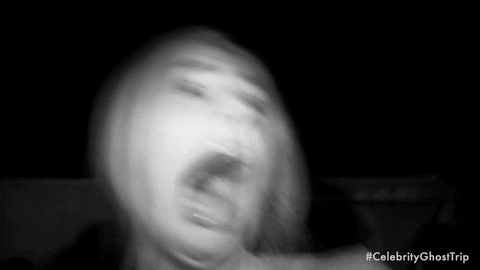




You are now in bedroom 1.
Time remaining: 49 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?queen bed
You examine queen bed. You find key for 🔑 door b.



Time remaining: 46 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door b
You examine door b. You unlock it with a key you have. 🤩
Do you want to go to the next room? Enter 'yes' or 'no': yes


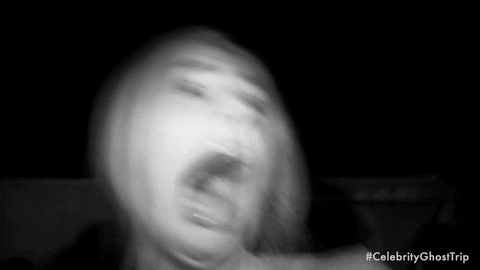




You are now in bedroom 2.
Time remaining: 38 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?double bed
You examine double bed. You find key for 🔑 door c.



Time remaining: 34 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?dresser
You examine dresser. You find key for 🔑 door d.



Time remaining: 30 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door b
You examine door b. You unlock it with a key you have. 🤩
Do you want to go to the next room? Enter 'yes' or 'no': yes


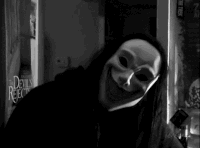




You are now in bedroom 1.
Time remaining: 22 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door c
You examine door c. You unlock it with a key you have. 🤩
Do you want to go to the next room? Enter 'yes' or 'no': yes


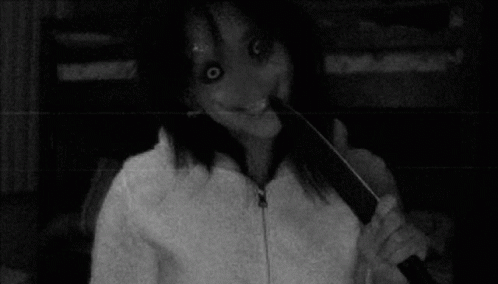




You are now in living room.
Time remaining: 15 seconds
What would you like to do? Type 'explore' or 'examine'?examine
What would you like to examine?door d
You examine door d. You unlock it with a key you have. 🤩
Do you want to go to the next room? Enter 'yes' or 'no': yes


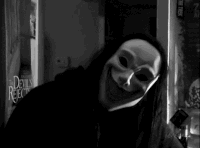




You are now in outside.
Time remaining: 8 seconds


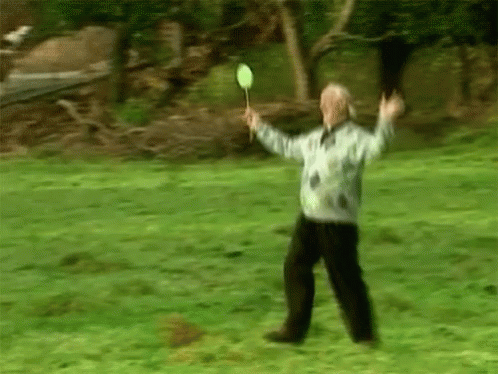

CONGRATS! 🎉 YOU ESCAPED THE ROOM!🎈





In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()  
